In [1]:
import pandas as pd
# pandas is aliased as pd
import numpy as np
# numpy is aliased as np
import matplotlib.pyplot as plt
# pyplot is aliased as plt
import seaborn as sns
# seaborn is aliased as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/honeyproduction 1998-2021.csv')
df.head()# top 5 rows

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,Alabama,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,Arizona,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,Arkansas,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,California,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,Colorado,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.shape
# Rows = 985 ,& Column = 8

(985, 8)

# **A. Data Preprocesing**

In [5]:
df.isnull().sum()

State          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

# **B. Check Datatypes**

In [6]:
df.dtypes


State           object
numcol         float64
yieldpercol      int64
totalprod      float64
stocks         float64
priceperlb     float64
prodvalue      float64
year             int64
dtype: object

# **C.Checking Duplicate Values**




In [7]:
df.duplicated().sum()

0

###<b>D.Extract all Categorical Columns and Numerical Columns<b>

In [8]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)
num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['State'], dtype='object')
Index(['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb',
       'prodvalue', 'year'],
      dtype='object')


In [9]:
s2 = df['State'].value_counts()
print(type(s2)) # Series
s2


<class 'pandas.core.series.Series'>


Alabama           24
Montana           24
New Jersey        24
New York          24
North Carolina    24
North Dakota      24
Ohio              24
Oregon            24
Pennsylvania      24
South Dakota      24
Tennessee         24
Texas             24
Utah              24
Vermont           24
Virginia          24
Washington        24
West Virginia     24
Wisconsin         24
Wyoming           24
Arizona           24
Nebraska          24
Missouri          24
Iowa              24
Arkansas          24
California        24
Colorado          24
Florida           24
Georgia           24
Hawaii            24
Idaho             24
Illinois          24
Indiana           24
Kansas            24
Mississippi       24
Kentucky          24
Louisiana         24
Maine             24
Michigan          24
Minnesota         24
New Mexico        15
Nevada            11
South Carolina    11
Oklahoma           6
Maryland           6
Name: State, dtype: int64

In [10]:
s3 = df['year'].value_counts()
s3

2001    44
2002    44
2003    44
1998    43
2000    43
1999    43
2007    41
2008    41
2006    41
2005    41
2004    41
2015    40
2020    40
2019    40
2018    40
2017    40
2016    40
2010    40
2014    40
2012    40
2011    40
2009    40
2021    40
2013    39
Name: year, dtype: int64

# **1. How has honey production yield changed from 1998 to 2021 ?**

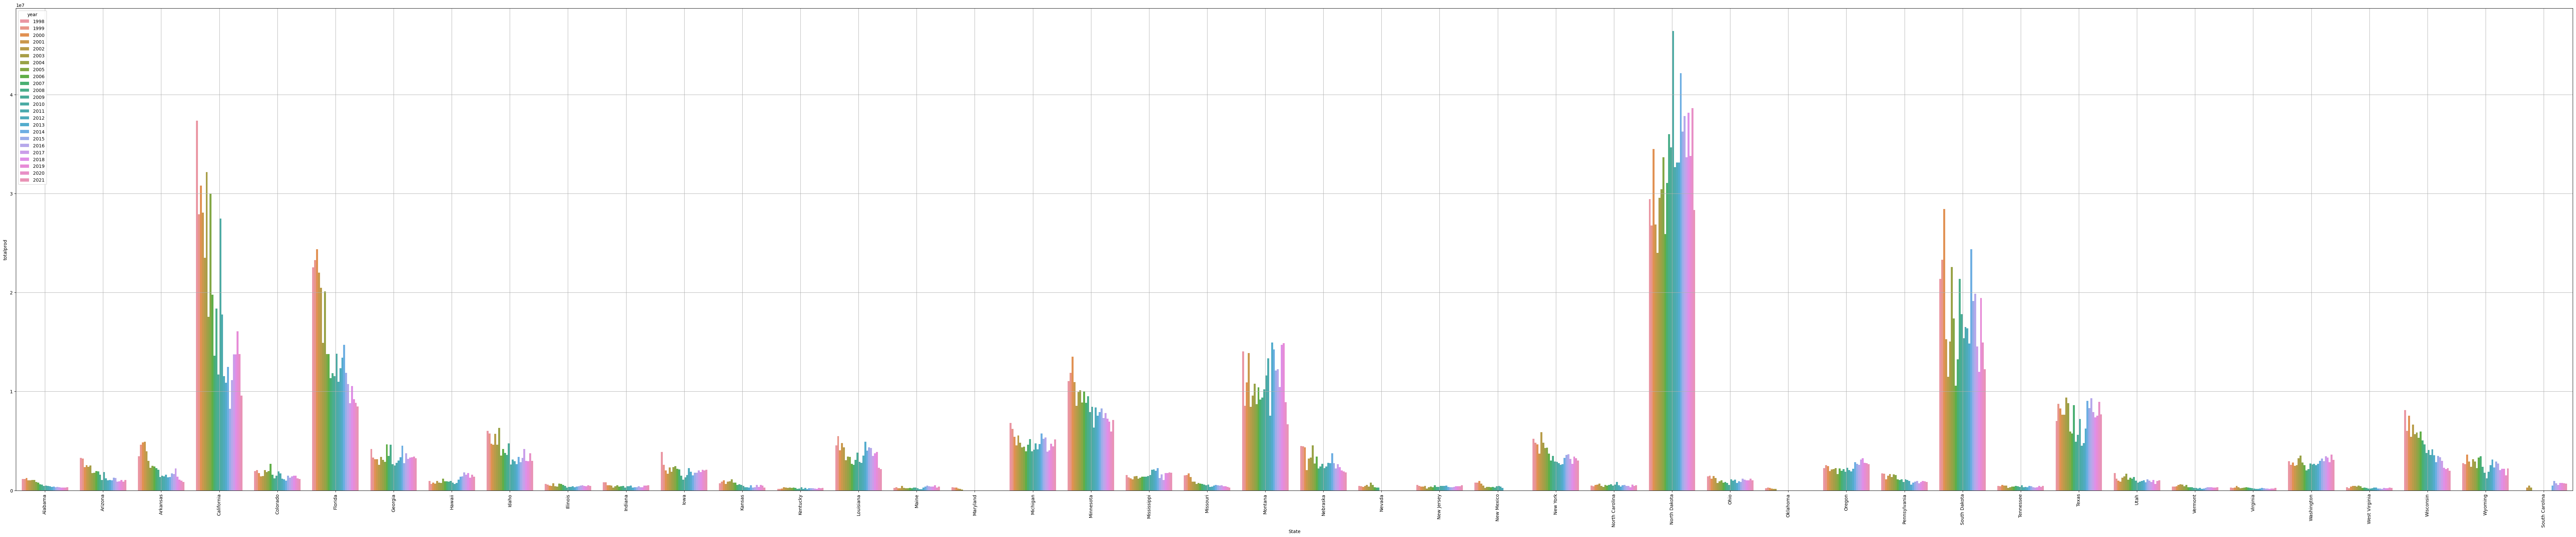

<Figure size 640x480 with 0 Axes>

In [11]:
ndf = df[df['year']>=1998]
ndf.head()

plt.figure(figsize=(100,19))
sns.barplot(data=ndf,x='State',y='totalprod',hue='year',ci=None)
plt.xticks(rotation=90)
plt.grid()
plt.show()
plt.savefig('Year Yield Changes (1998-2021).png')

# **2. Over Time, What Are The Major Production Trends Across The States ?**

In [12]:
sdf = df.groupby(['year','State'])['totalprod'].max().reset_index()
print(type(sdf)) # DataFrame
sdf.head(100)

<class 'pandas.core.frame.DataFrame'>


,year,State,totalprod
0,1998,Alabama,1136000.0
1,1998,Arizona,3300000.0
2,1998,Arkansas,3445000.0
3,1998,California,37350000.0
4,1998,Colorado,1944000.0
...,...,...,...
95,2000,Illinois,488000.0
96,2000,Indiana,520000.0
97,2000,Iowa,2010000.0
98,2000,Kansas,1020000.0


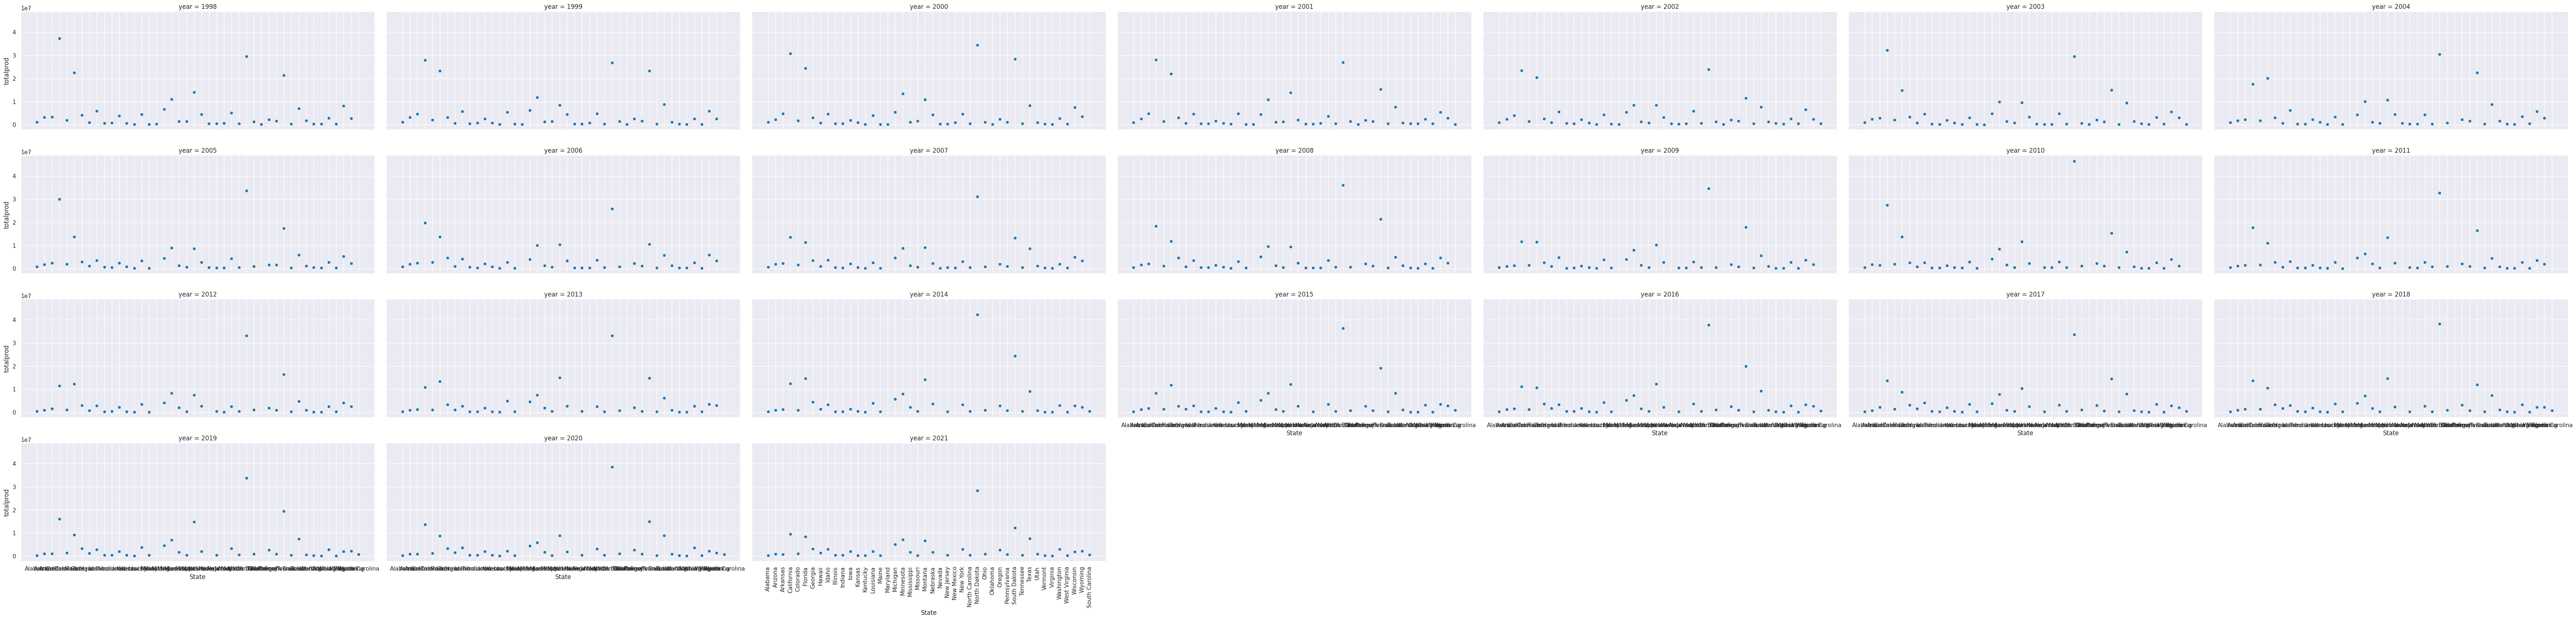

<Figure size 640x480 with 0 Axes>

In [13]:
sns.set_style('darkgrid')
sns.set_context('notebook')
sea = sns.FacetGrid(sdf,col='year',col_wrap=7,height=4,aspect=2.5)
sea.map(sns.scatterplot,'State','totalprod')
plt.xticks(rotation=90)
plt.show()
plt.savefig('OverTime Major Prod.png')

## **3.Does The Data Show Any Trends In Terms Of The Number of Honey Producing Colonies and Yield Per Colony Before 2006, Which Was When Concern Over Colony Collapse Disorder Spread Nationwide ?**

In [14]:
n2df = df[df['year']<2006] # Before 2006 
n2df.tail()

,State,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
338,Virginia,8000.0,37,296000.0,59000.0,2.20,651000.0,2005
339,Washington,51000.0,55,2805000.0,1935000.0,1.01,2833000.0,2005
340,West Virginia,8000.0,51,408000.0,102000.0,1.29,526000.0,2005
341,Wisconsin,64000.0,83,5312000.0,2922000.0,1.14,6056000.0,2005
342,Wyoming,40000.0,56,2240000.0,291000.0,0.89,1994000.0,2005


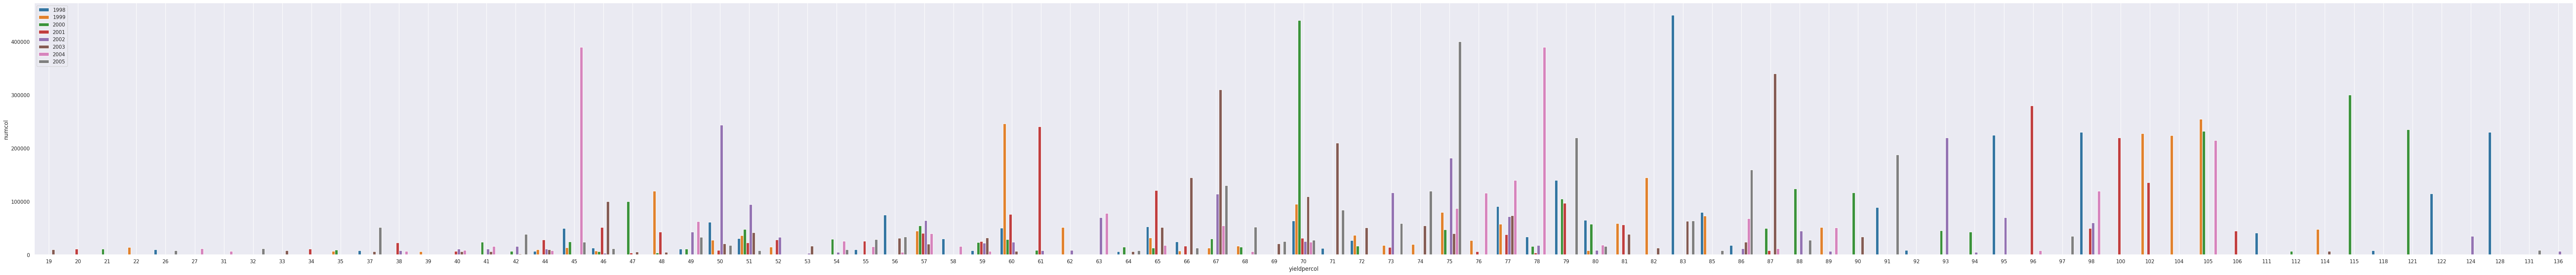

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(100,10))
sns.barplot(data=n2df,x='yieldpercol',y='numcol',hue='year',ci=None)
plt.grid()
plt.legend(loc='upper left')
plt.show()
plt.savefig('Trends Yield Changes.png')

# **4.Are There Any Patterns That Can Be Observed Between Total Honey Production and Value of Production Every Year ?**

In [16]:
s3 = df.groupby(['year'])[['totalprod','prodvalue']].sum()
s3

,totalprod,prodvalue
year,,
1998,219519000.0,146091000.0
1999,202387000.0,123657000.0
2000,219558000.0,131568000.0
2001,185748000.0,132282000.0
2002,171265000.0,227302000.0
2003,181372000.0,252079000.0
2004,182729000.0,197307000.0
2005,173969000.0,160793000.0
2006,154238000.0,157924000.0


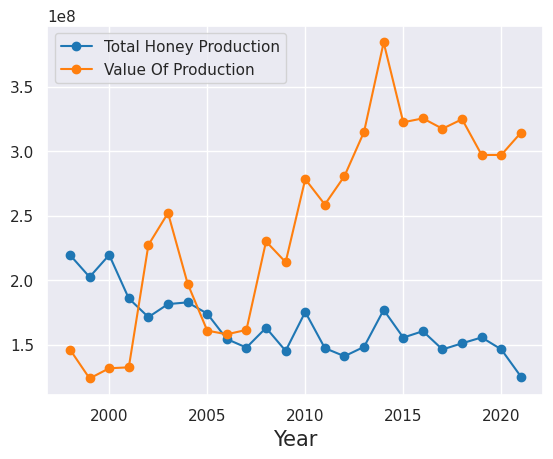

<Figure size 640x480 with 0 Axes>

In [17]:
s3.plot(kind='line',marker='o')
plt.xlabel('Year',fontsize=15)
plt.xticks(rotation=360)
plt.legend(['Total Honey Production','Value Of Production'],loc='upper left')
plt.show()
plt.savefig('Pattern Observed.png')

# **5.How Has The Value of Production, Which in Some Sense Could Be Tied to Demand, Changed Every Year ?**

In [18]:
s4 = df.groupby(['year'])[['stocks','prodvalue']].sum()
s4  

,stocks,prodvalue
year,,
1998,80565000.0,146091000.0
1999,78390000.0,123657000.0
2000,84956000.0,131568000.0
2001,64764000.0,132282000.0
2002,39177000.0,227302000.0
2003,40619000.0,252079000.0
2004,60981000.0,197307000.0
2005,62187000.0,160793000.0
2006,60235000.0,157924000.0


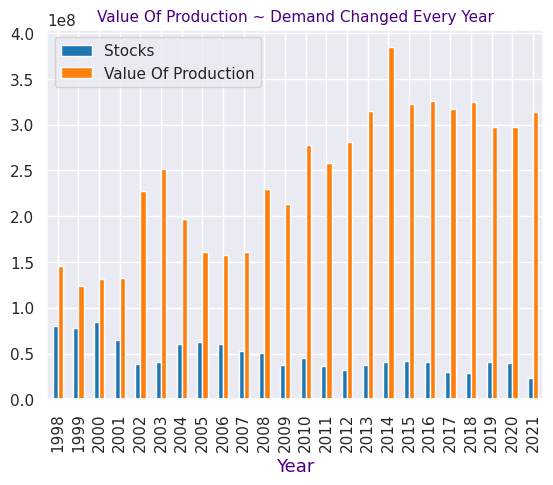

<Figure size 640x480 with 0 Axes>

In [29]:
s4.plot(kind='bar')
plt.xlabel('Year',fontsize=13,color='indigo')
plt.title('Value Of Production ~ Demand Changed Every Year',fontsize=11,color='indigo')
plt.legend(['Stocks','Value Of Production'],loc='upper left')
plt.show()
plt.savefig('Demand Changed Year Wise.png')

# **6.Constructs the related plots using Seaborn and Matplot apply customization and derive insights from the visualization.**

In [20]:
s4 = df.groupby(['year'])[['stocks','prodvalue']].sum()
s4  

,stocks,prodvalue
year,,
1998,80565000.0,146091000.0
1999,78390000.0,123657000.0
2000,84956000.0,131568000.0
2001,64764000.0,132282000.0
2002,39177000.0,227302000.0
2003,40619000.0,252079000.0
2004,60981000.0,197307000.0
2005,62187000.0,160793000.0
2006,60235000.0,157924000.0


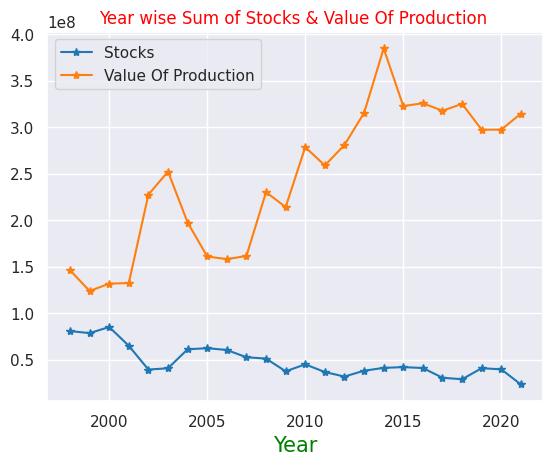

<Figure size 640x480 with 0 Axes>

In [21]:
s4.plot(kind='line',marker='*')
plt.title('Year wise Sum of Stocks & Value Of Production ',fontsize=12,color='red')
plt.xlabel('Year',fontsize=15,color='green')
plt.legend(['Stocks','Value Of Production'],loc='upper left')
plt.show()
plt.savefig('Related Visualisation1.png')

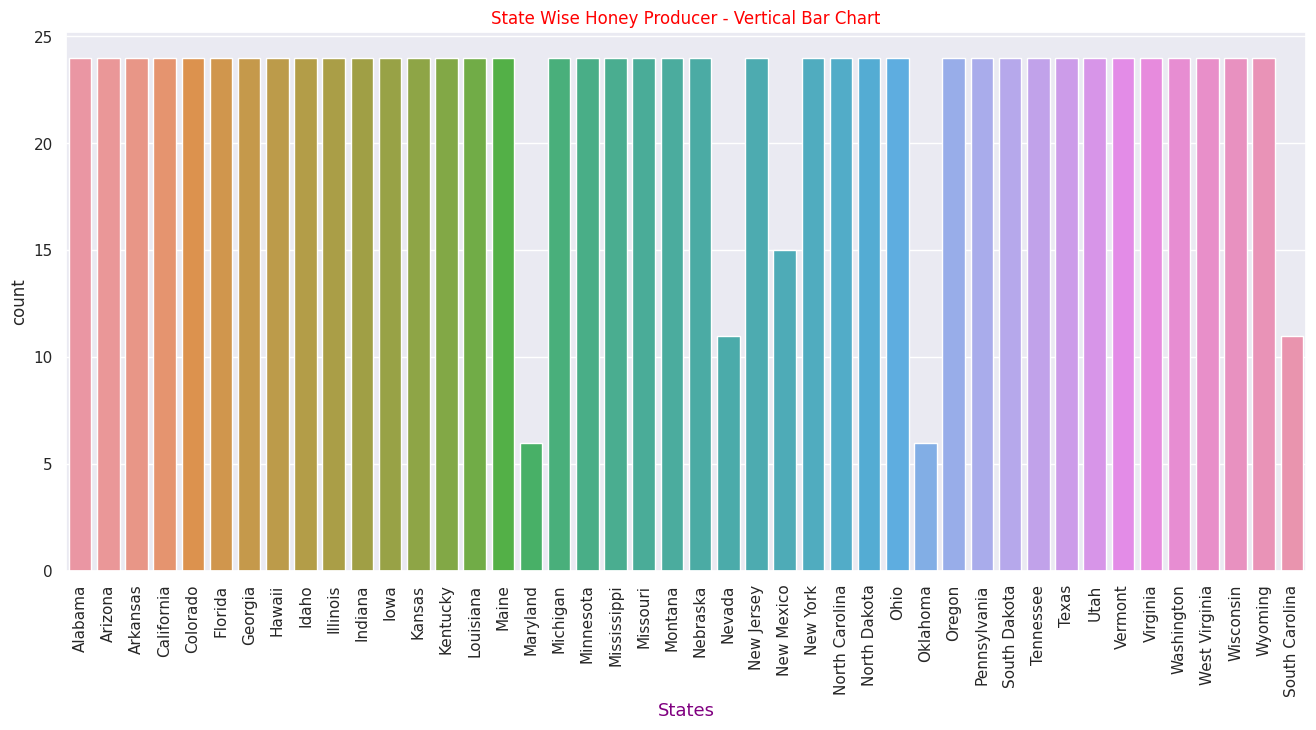

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(16,7))
sns.countplot(x= df['State'])
plt.title('State Wise Honey Producer - Vertical Bar Chart',color='red')
plt.xlabel('States',fontsize=13,color='purple')
plt.xticks(rotation=90)
plt.show()
plt.savefig('Related Visualisation2.png')